In [1]:
#PREDICTION OF SALES PRICE 
import pandas as pd

In [2]:
df=pd.read_csv('1. Regression - Module - (Housing Prices).csv')

In [3]:
df['Condition of the House'].head(5)

0         Fair
1         Fair
2         Fair
3    Excellent
4         Fair
Name: Condition of the House, dtype: object

In [4]:
df['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [6]:
df.describe()

ID    Sale Price  No of Bedrooms  No of Bathrooms  \
count  2.161300e+04  2.160900e+04    21613.000000     21609.000000   
mean   4.580302e+09  5.401984e+05        3.370842         2.114732   
std    2.876566e+09  3.673890e+05        0.930062         0.770138   
min    1.000102e+06  7.500000e+04        0.000000         0.000000   
25%    2.123049e+09  3.219500e+05        3.000000         1.750000   
50%    3.904930e+09  4.500000e+05        3.000000         2.250000   
75%    7.308900e+09  6.450000e+05        4.000000         2.500000   
max    9.900000e+09  7.700000e+06       33.000000         8.000000   

       Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors  Overall Grade  \
count         21604.000000        2.160400e+04  21613.000000   21613.000000   
mean           2079.931772        1.510776e+04      1.494309       7.623467   
std             918.487597        4.142827e+04      0.539989       1.105439   
min             290.000000        5.200000e+02      1.000000       1.000000   
25%            1429.250000        5.040000e+03      1.000000       7.000000   
50%            1910.000000        7.617500e+03      1.500000       7.000000   
75%            2550.000000        1.068825e+04      2.000000       8.000000   
max           13540.000000        1.651359e+06      3.500000      10.000000   

       Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  \
count                               21610.000000             21613.000000   
mean                                 1788.344193               291.509045   
std                                   827.982604               442.575043   
min                                   290.000000                 0.000000   
25%                                  1190.000000                 0.000000   
50%                                  1560.000000                 0.000000   
75%                                  2210.000000               560.000000   
max                                  9410.000000              4820.000000   

       Age of House (in Years)  Renovated Year       Zipcode      Latitude  \
count             21613.000000    21613.000000  21612.000000  21612.000000   
mean                 46.994864       84.402258  98077.937766     47.560048   
std                  29.373411      401.679240     53.505425      0.138565   
min                   3.000000        0.000000  98001.000000     47.155900   
25%                  21.000000        0.000000  98033.000000     47.470975   
50%                  43.000000        0.000000  98065.000000     47.571800   
75%                  67.000000        0.000000  98118.000000     47.678000   
max                 118.000000     2015.000000  98199.000000     47.777600   

          Longitude  Living Area after Renovation (in Sqft)  \
count  21612.000000                            21612.000000   
mean    -122.213892                             1986.538914   
std        0.140830                              685.404255   
min     -122.519000                              399.000000   
25%     -122.328000                             1490.000000   
50%     -122.230000                             1840.000000   
75%     -122.125000                             2360.000000   
max     -121.315000                             6210.000000   

       Lot Area after Renovation (in Sqft)  
count                         21613.000000  
mean                          12768.455652  
std                           27304.179631  
min                             651.000000  
25%                            5100.000000  
50%                            7620.000000  
75%                           10083.000000  
max                          871200.000000

In [7]:
zip_cond=df.groupby(['Condition of the House'])['Sale Price'].mean()

In [8]:
zip_cond

Condition of the House
Bad          334431.666667
Excellent    612577.742504
Fair         542130.611206
Good         521277.510567
Okay         327316.215116
Name: Sale Price, dtype: float64

In [9]:
l=[]
for i in zip_cond:
    l.append(i)

In [10]:
l

[334431.6666666667,
 612577.7425044092,
 542130.6112061591,
 521277.51056710107,
 327316.2151162791]

In [11]:
labels=df['Condition of the House'].unique()

In [12]:
labels

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [13]:
import numpy as np
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
fig = px.pie(df, values=l, names=labels, title='mean sale price as per condition of house', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()


In [14]:
#OUTLIERS IN GRAPHICAL VIEW
fig = px.scatter(df, x='ID', y="Sale Price")
fig.show()

In [15]:
#IDENTIFY OUTLIERS IN MATHEMATICAL FORM with inter quarntile method
q3=df['Sale Price'].quantile(.75)
q1=df['Sale Price'].quantile(.25)

In [16]:
iqr=q3-q1

In [17]:
iqr

323050.0

In [18]:
lower_limit=q1-1.5*iqr

In [19]:
lower_limit

-162625.0

In [20]:
upper_limit=q1+1.5*iqr

In [21]:
#perform imputing method to treat with outliers(independent variables)
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value
df['Sale Price']=df['Sale Price'].apply(limit_imputer)

In [22]:
df['Sale Price'].describe()

count     21609.000000
mean     485048.221667
std      197301.596234
min       75000.000000
25%      321950.000000
50%      450000.000000
75%      645000.000000
max      806525.000000
Name: Sale Price, dtype: float64

In [23]:
fig = px.scatter(df, x='ID', y="Sale Price",trendline='ols')
fig.show()

In [24]:
#treat with missing values(target variables)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [25]:
df.dropna(inplace=True,axis=0,subset=['Sale Price'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [30]:
#treat misiing values of (independent variables)
num_col=['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)','Latitude','Longitude','Living Area after Renovation (in Sqft)']

In [31]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
df[num_col]=imputer.fit_transform(df[num_col])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [36]:
#IMP: ZIPCODE CANT BE TREATED AS CONTINUOUS VARIABLE ,IT SHOULD BE TREATED AS CATEGORICAL VARIABLE SO,THIS WAY YOU CAN DO
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Zipcode']=imputer.fit_transform(df['Zipcode'])
#BUT HERE IS AN IMP ERROR TO UNDERSTAND

ValueError: Expected 2D array, got 1D array instead:
array=[98178. 98125. 98028. ... 98144. 98027. 98144.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [37]:
df['Zipcode'].shape

(21609,)

In [49]:
#we need to convert our array in 2d
column=df['Zipcode'].values.reshape(-1,1)

In [50]:
column.shape

(21609, 1)

In [59]:
#as our zipcode is in 2d,now we can do fit transform again for zipcode column
column=df['Zipcode'].values.reshape(-1,1)
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Zipcode']=imputer.fit_transform(column)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [61]:
#variable transformaton
#we cannot have direct relation with sale price and zip code so we will but we can check sale price zipcode wise category
df['Zipcode']=df['Zipcode'].astype(object)
df.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                       object
Latitude                                     float64
Longitude                                    f

In [70]:
import plotly.express as px
fig = px.bar(df, x = "Zipcode", y = "Sale Price",title='variation of sale price as per zipcode')
fig.show()

In [73]:
#variable transformation over 'no of times visited' col as it does not represent data properly
df['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [74]:
mapping={'None':'0', 'Thrice':'3', 'Four':'4', 'Twice':'2', 'Once':'1'}

In [75]:
df['No of Times Visited']=df['No of Times Visited'].map(mapping)

In [76]:
df['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

In [77]:
#variable transformation used to create new variable by combining or transforming 2 variables
#by looking at 'renovation year' we can have que when renovation was done and how it can impact sale price
#create 2 variables 'ever renovated' and 'years since renovataion'
df['ever renovated']=np.where(df['Renovated Year']==0,'No','Yes')

In [80]:
#for 2nd variable fetch year from 'date of sold col'
df['purchase year']=pd.DatetimeIndex(df['Date House was Sold']).year

In [82]:
df['purchase year'].head(5)

0    2017
1    2017
2    2016
3    2017
4    2016
Name: purchase year, dtype: int64

In [91]:
df['years since renovataion']=np.where(df['ever renovated']=='Yes',abs(df['purchase year']-df['Renovated Year']),0)

In [92]:
df['years since renovataion'].tail(5)

21608    0
21609    0
21610    0
21611    0
21612    0
Name: years since renovataion, dtype: int64

In [93]:
df.head()

ID Date House was Sold  Sale Price  No of Bedrooms  \
0  7129300520     14 October 2017    221900.0               3   
1  6414100192    14 December 2017    538000.0               3   
2  5631500400    15 February 2016    180000.0               2   
3  2487200875    14 December 2017    604000.0               4   
4  1954400510    15 February 2016    510000.0               3   

   No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors  \
0             1.00               1180.0              5650.0           1.0   
1             2.25               2570.0              7242.0           2.0   
2             1.00                770.0             10000.0           1.0   
3             3.00               1960.0              5000.0           1.0   
4             2.00               1680.0              8080.0           1.0   

  Waterfront View No of Times Visited  ... Renovated Year  Zipcode  Latitude  \
0              No                   0  ...              0  98178.0   47.5112   
1              No                   0  ...           1991  98125.0   47.7210   
2              No                   0  ...              0  98028.0   47.7379   
3              No                   0  ...              0  98136.0   47.5208   
4              No                   0  ...              0  98074.0   47.6168   

   Longitude  Living Area after Renovation (in Sqft)  \
0   -122.257                                  1340.0   
1   -122.319                                  1690.0   
2   -122.233                                  2720.0   
3   -122.393                                  1360.0   
4   -122.045                                  1800.0   

   Lot Area after Renovation (in Sqft)  zipcode  ever renovated  \
0                                 5650  98178.0              No   
1                                 7639  98125.0             Yes   
2                                 8062  98028.0              No   
3                                 5000  98136.0              No   
4                                 7503  98074.0              No   

   purchase year  years since renovataion  
0           2017                        0  
1           2017                       26  
2           2016                        0  
3           2017                        0  
4           2016                        0  

[5 rows x 25 columns]

In [94]:
#AS WE SEE WE GOT OUR COLOUMN NOW WE DONT REQUIRE USELESS COLUMNS,WE WILL DELETE THOSE TO KEEP OUR DATA TIDY
df.drop(columns=['Date House was Sold','Renovated Year','purchase year'],inplace=True)

In [95]:
df.head()

ID  Sale Price  No of Bedrooms  No of Bathrooms  \
0  7129300520    221900.0               3             1.00   
1  6414100192    538000.0               3             2.25   
2  5631500400    180000.0               2             1.00   
3  2487200875    604000.0               4             3.00   
4  1954400510    510000.0               3             2.00   

   Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors Waterfront View  \
0               1180.0              5650.0           1.0              No   
1               2570.0              7242.0           2.0              No   
2                770.0             10000.0           1.0              No   
3               1960.0              5000.0           1.0              No   
4               1680.0              8080.0           1.0              No   

  No of Times Visited Condition of the House  ...  Basement Area (in Sqft)  \
0                   0                   Fair  ...                        0   
1                   0                   Fair  ...                      400   
2                   0                   Fair  ...                        0   
3                   0              Excellent  ...                      910   
4                   0                   Fair  ...                        0   

   Age of House (in Years)  Zipcode  Latitude Longitude  \
0                       63  98178.0   47.5112  -122.257   
1                       67  98125.0   47.7210  -122.319   
2                       85  98028.0   47.7379  -122.233   
3                       53  98136.0   47.5208  -122.393   
4                       31  98074.0   47.6168  -122.045   

   Living Area after Renovation (in Sqft)  \
0                                  1340.0   
1                                  1690.0   
2                                  2720.0   
3                                  1360.0   
4                                  1800.0   

   Lot Area after Renovation (in Sqft)  zipcode  ever renovated  \
0                                 5650  98178.0              No   
1                                 7639  98125.0             Yes   
2                                 8062  98028.0              No   
3                                 5000  98136.0              No   
4                                 7503  98074.0              No   

   years since renovataion  
0                        0  
1                       26  
2                        0  
3                        0  
4                        0  

[5 rows x 22 columns]

In [96]:
#correlation calculation
df['Sale Price'].corr(df['Flat Area (in Sqft)'])

0.6492472259786739

In [97]:
#correlation between independent variables
df.drop(columns=['ID']).corr()

C:\Users\Janhavi\AppData\Local\Temp\ipykernel_8236\3805217886.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Sale Price  No of Bedrooms  \
Sale Price                                   1.000000        0.333635   
No of Bedrooms                               0.333635        1.000000   
No of Bathrooms                              0.509890        0.515813   
Flat Area (in Sqft)                          0.649247        0.576628   
Lot Area (in Sqft)                           0.101291        0.031692   
No of Floors                                 0.303304        0.175536   
Overall Grade                                0.664972        0.349223   
Area of the House from Basement (in Sqft)    0.568595        0.477549   
Basement Area (in Sqft)                      0.283494        0.303294   
Age of House (in Years)                     -0.066771       -0.154113   
Latitude                                     0.453716       -0.008708   
Longitude                                    0.063154        0.129569   
Living Area after Renovation (in Sqft)       0.600540        0.391771   
Lot Area after Renovation (in Sqft)          0.092041        0.029264   
zipcode                                     -0.033636       -0.152760   
years since renovataion                      0.054093       -0.007198   

                                           No of Bathrooms  \
Sale Price                                        0.509890   
No of Bedrooms                                    0.515813   
No of Bathrooms                                   1.000000   
Flat Area (in Sqft)                               0.754568   
Lot Area (in Sqft)                                0.087732   
No of Floors                                      0.500776   
Overall Grade                                     0.635638   
Area of the House from Basement (in Sqft)         0.685088   
Basement Area (in Sqft)                           0.283798   
Age of House (in Years)                          -0.505954   
Latitude                                          0.024570   
Longitude                                         0.223171   
Living Area after Renovation (in Sqft)            0.568568   
Lot Area after Renovation (in Sqft)               0.087226   
zipcode                                          -0.203951   
years since renovataion                           0.003551   

                                           Flat Area (in Sqft)  \
Sale Price                                            0.649247   
No of Bedrooms                                        0.576628   
No of Bathrooms                                       0.754568   
Flat Area (in Sqft)                                   1.000000   
Lot Area (in Sqft)                                    0.172721   
No of Floors                                          0.354142   
Overall Grade                                         0.705725   
Area of the House from Basement (in Sqft)             0.876226   
Basement Area (in Sqft)                               0.435142   
Age of House (in Years)                              -0.318146   
Latitude                                              0.052538   
Longitude                                             0.240091   
Living Area after Renovation (in Sqft)                0.756185   
Lot Area after Renovation (in Sqft)                   0.183223   
zipcode                                              -0.199380   
years since renovataion                               0.023503   

                                           Lot Area (in Sqft)  No of Floors  \
Sale Price                                           0.101291      0.303304   
No of Bedrooms                                       0.031692      0.175536   
No of Bathrooms                                      0.087732      0.500776   
Flat Area (in Sqft)                                  0.172721      0.354142   
Lot Area (in Sqft)                                   1.000000     -0.005162   
No of Floors                                        -0.005162      1.000000   
Overall Grade                                        0.102314      0.4

In [98]:
#how to identify categorical variable: variable with datatype object
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Waterfront View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  object 
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade         

In [99]:
df['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

<Axes: xlabel='Condition of the House'>

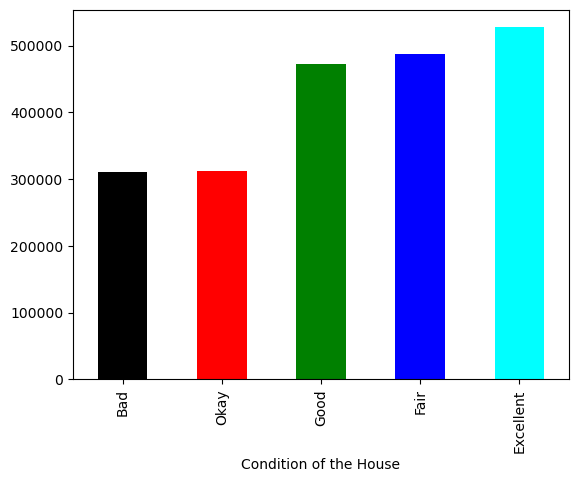

In [114]:
#relationship of independent with dependent variables
df.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan'])

<Axes: xlabel='Waterfront View'>

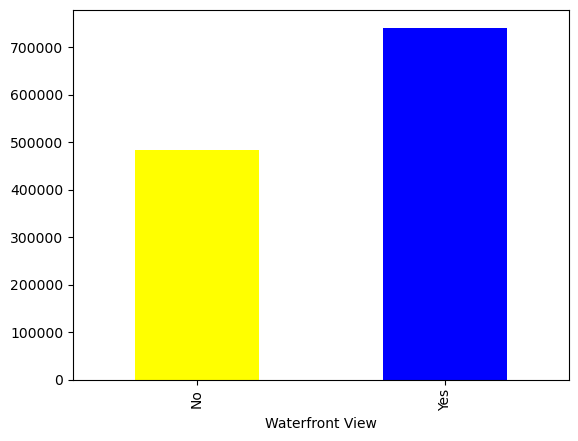

In [117]:
df.groupby('Waterfront View')['Sale Price'].mean().sort_values().plot(kind='bar',color=['yellow', 'blue'])

<Axes: xlabel='Zipcode'>

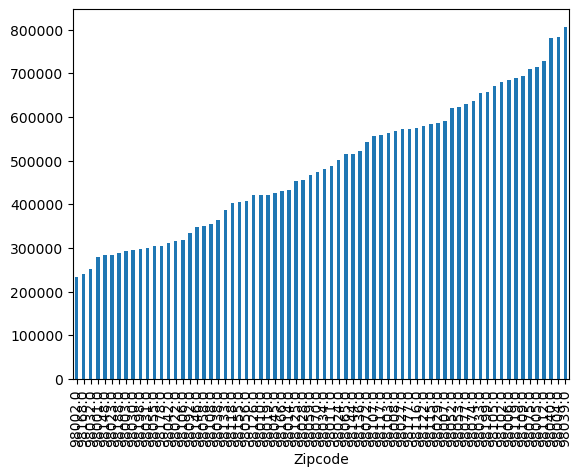

In [118]:
df.groupby('Zipcode')['Sale Price'].mean().sort_values().plot(kind='bar')

In [ ]:
#Binning
df=pd.get_dummies(df)